# Lecture 4: One-locus selection

## Lecture overview

1. [Review of Hardy-Weinberg](#section1)
2. [One-locus haploid selection in discrete time](#section2)
3. [One-locus diploid selection in discrete time](#section3)
4. [Comparing haploid and diploid selection](#section4)
5. [One-locus haploid selection in continuous time](#section5)
6. [Comparing haploid selection in discrete and continuous time](#section6)
7. [The models we've covered](#section7)

<span id='section1'></span>
## 1. Review of Hardy-Weinberg
<hr>

In Lecture 2 we saw that one round of random union among gametes (equivalently, random mating among diploids) causes the frequency of diploid genotypes at a locus with two alleles, $A$ and $a$, to become

- $AA$: $p^2$
- $Aa$: $2pq$
- $aa$: $q^2$

where $p$ is the frequency of allele $A$ and $q=1-p$ is the frequency of allele $a$. 

A population with these diploid genotype frequencies is said to be in Hardy-Weinberg equilibrium. Furthermore, we showed that under this model the allele frequencies do not change, $p' = p$. 

But what if there is natural selection?

<span id='section2'></span>
## 2. One-locus haploid selection in discrete time
<hr>

We begin by examining a model where selection acts during the haploid phase of the life-cycle. This is a little simpler than diploid selection because there are only two haploid genotypes, $A$ and $a$. It is also a very relevant model for species with long haploid phases (eg, some algae and fungi) or with strong competition during the haploid phase (eg, pollen competiting for ovules).

### Life-cycle diagram

We first illustrate the structure of the model with a life-cycle diagram.

<center>
```mermaid
    graph LR;
    A((p)) --gamete union--> B((p'));
    B --meiosis--> C((p''));
    C --selection--> A;
```    
</center>

We will census the population at the beginning of the haploid phase (immediately after meiosis).

### Deriving the equations

Let the number of haploid individuals with each allele be

- $n_A(t) =$ number of individuals with the $A$ allele in generation $t$
- $n_a(t) =$ number of individuals with the $a$ allele in generation $t$

The frequency of $A$ is therefore $p(t) = \frac{n_a(t)}{n_A(t) + n_a(t)}$.

Now, let’s assume that during selection each haploid individual has reproductive factor

- $W_A =$ reproductive factor of individuals with the $A$ allele 
- $W_a =$ reproductive factor of individuals with the $a$ allele

These reproductive factors are referred to as the **absolute fitnesses** as they determine the (absolute) numbers of individuals after selection, $n_i' = W_i n_i(t)$ for $i=A$ and $i=a$. To relate back to the models of population growth in Lecture 3, this is exponential growth of each allele.

After selection these alleles randomly pair, go through the dipliod phase of the life cycle, and then segregate back into haploids after meiosis. From our analysis of Hardy-Weinberg we know random mating and segregation don't affect allele frequency. The frequency of $A$ in the next generation is therefore

$$
\begin{aligned}
p(t+1) 
&= \frac{n_A(t+1)}{n_A(t+1) + v_a n_a(t)} \\
&= \frac{W_A n_A(t)}{W_A n_A(t) + W_a n_a(t)}.
\end{aligned}
$$

To make this a recursion equation we need to write $p(t+1)$ in terms of $p(t)$, so that if we knew $p$ at some point in time we can recursively calculate it in all future times. To do this we divide both the numerator and denominator by the total number of individuals, $n_A(t) + n_a(t)$, and simplify

$$
\begin{aligned}
p(t+1) 
&= \frac{W_A n_A(t)}{W_A n_A(t) + W_a n_a(t)} \\
&= \frac{W_A\frac{n_A(t)}{n_A(t) + n_a(t)}}{W_A\frac{n_A(t)}{n_A(t) + n_a(t)} + W_a\frac{n_a(t)}{n_A(t) + n_a(t)}}\\
&= \frac{W_A p(t)}{W_A p(t) + W_a q(t)}.
\end{aligned}
$$

This is now a recursion equation for the allele frequency in our model of haploid selection.

### Simplifying

Our current recursion is a function of two parameters, the absolute fitnesses $W_A$ and $W_a$. Now notice that if we divide both the numerator and denominator by one of these fitnesses, say $W_a$, then we can reduce the recursion to a function of only one parameter, $w_A = W_A/W_a$, the fitness of $A$ *relative* to the fitness of $a$,

$$
\begin{aligned}
p(t+1) &= \frac{(W_A/W_a)p(t)}{(W_A/W_a)p(t) + (W_a/W_a)q(t)}\\
&= \frac{w_A p(t)}{w_A p(t) + q(t)}.
\end{aligned}
$$

Note that the allele frequency dynamics depend only on the **relative fitnesses**, and not on the absolute fitnesses, meaning that evolution does not depend on how the size of the population changes. It is therefore possible to study evolution while ignoring population dynamics under this simple model.

Let's plot the recursion to get a sense of the dynamics.

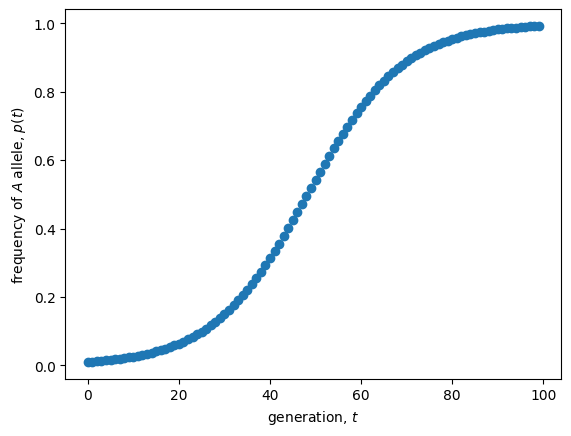

In [1]:
import matplotlib.pyplot as plt

# calculate allele frequency over time with recursion
w_A = 1.1 #relative fitness of allele A
p_now = 0.01 #initial allele frequency, p_0
ps = [] #list to hold allele frequencies over time
ts = range(100) #list of time steps
for t in ts: #for each time
    ps.append(p_now) #add current allele frequency to list
    p_now = w_A*p_now/(w_A*p_now+(1-p_now)) #update allele frequency with our recursion equation
    
# plot
plt.scatter(ts, ps) #plot the (t,p) pairs
plt.xlabel("generation, $t$") #label axes
plt.ylabel("frequency of $A$ allele, $p(t)$")
plt.show()

<span id='section3'></span>
## 3. One-locus diploid selection in discrete time
<hr>

Since we are all currently in the diploid phase of our life-cycle, it is natural to ask: *Does selection in the diploid phase work the same way?*

### Life-cycle diagram

We now have the following life-cycle diagram.

<center>
```mermaid
    graph LR;
    A((p)) --gamete union--> B((p'));
    B --selection--> C((p''));
    C --meiosis--> A;
```   
</center>

We will census at the beginning of the diploid phase (immediately after gamete union).

### Deriving the equations

Let the number of diploid individuals with each genotype be

- $n_{AA}(t) =$ number of individuals with the $AA$ genotype in generation $t$
- $n_{Aa}(t) =$ number of individuals with the $Aa$ genotype in generation $t$
- $n_{aa}(t) =$ number of individuals wite the $aa$ genotype in generation $t$

The frequency of allele $A$ is then

$$
\begin{aligned}
p(t)
&= \frac{2n_{AA}(t) + n_{Aa}(t)}{2n_{AA}(t) + n_{Aa}(t) + n_{aa}(t)} \\
&= \frac{n_{AA}(t) + \frac{1}{2}n_{Aa}(t)}{n_{AA}(t) + n_{Aa}(t) + n_{aa}(t)}
\end{aligned}
$$

Now, let’s assume that during selection each diploid individual has reproductive factor

- $W_{AA} =$ reproductive factor of individuals with the $AA$ genotype 
- $W_{Aa} =$ reproductive factor of individuals with the $Aa$ genotype
- $W_{aa} =$ reproductive factor of individuals with the $aa$ genotype

These reproductive factors are again referred to as the **absolute fitnesses** as they determine the (absolute) numbers of individuals after selection, $n_i' = W_i n_i(t)$ for $i=AA$, $i=Aa$, and $i=aa$.

After selection these genotypes segregate into haploids via meiosis, go through the haploid phase of the life cycle, and then random join to create diploids again. Again, we know random union and segregation don't affect allele frequency. The frequency of $A$ in the next generation is therefore

$$
\begin{aligned}
p(t+1) 
&= \frac{n_{AA}(t+1) + \frac{1}{2}n_{Aa}(t+1)}{n_{AA}(t+1) + n_{Aa}(t+1) + n_{aa}(t+1)}\\
&= \frac{W_{AA}n_{AA}(t) + \frac{1}{2}W_{Aa}n_{Aa}(t)}{W_{AA}n_{AA}(t) + \frac{1}{2}W_{Aa}n_{Aa}(t) + W_{aa}n_{aa}(t)}.
\end{aligned}
$$

As above, we want a recursion equation in terms of allele frequency, so we want to replace the $n_i$'s in the right hand side of this equation with $p$'s. To do this we note that with the random union of gametes the diploid offspring are in Hardy-Weinberg proportions, so that

$$
\begin{aligned}
n_{AA}(t) &= p(t)^2 n(t) \\
n_{Aa}(t) &= 2p(t) q(t) n(t) \\
n_{aa}(t) &= q(t)^2 n(t)
\end{aligned}
$$

where $n(t) = n_{AA}(t) + n_{Aa}(t) + n_{aa}(t)$ is the total population size.

Substituting these Hardy-Weinberg proportions in and simplifying, the total population size cancels out and we can rewrite the above equation in terms of allele frequency alone,

$$
\begin{aligned}
p(t+1) 
&= \frac{W_{AA}p(t)^2 n(t) + W_{Aa}p(t) q(t) n(t)}{W_{AA}p(t)^2 n(t) + 2W_{Aa}p(t) q(t) n(t) + W_{aa}q(t)^2 n(t)}\\
&= \frac{W_{AA}p(t)^2 + W_{Aa}p(t) q(t)}{W_{AA}p(t)^2 + 2W_{Aa}p(t) q(t) + W_{aa}q(t)^2}.
\end{aligned}
$$

This is a recursion equation for allele frequency in our model of diploid selection.

### Simplifying

As in the haploid selection case, we can divide by one of the absolute fitnesses, say $W_{aa}$, to remove one parameter from the model

$$
\begin{aligned}
p(t+1)
&= \frac{(W_{AA}/W_{aa})p(t)^2 + (W_{Aa}/W_{aa})p(t) q(t)}{(W_{AA}/W_{aa})p(t)^2 + 2(W_{Aa}/W_{aa})p(t) q(t) + (W_{aa}/W_{aa})q(t)^2} \\
&= \frac{w_{AA}p(t)^2 + w_{Aa}p(t) q(t)}{w_{AA}p(t)^2 + 2w_{Aa}p(t) q(t) + q(t)^2}
\end{aligned}
$$

This recursion is a function of only two relative fitnesses, $w_{AA} = W_{AA}/W_{aa}$ and $w_{Aa} = W_{Aa}/W_{aa}$.

Let's plot the recursion to get a sense of the dynamics.

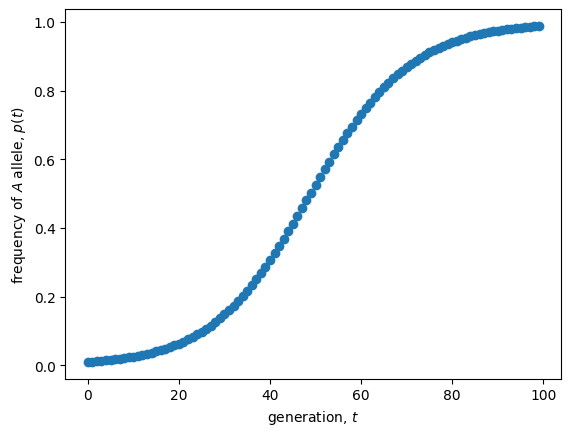

In [2]:
import matplotlib.pyplot as plt

# calculate allele frequency over time with recursion
w_AA = 1.2 #relative fitness of genotype AA
w_Aa = 1.1 #relative fitness of genotype Aa 
p_now = 0.01 #initial allele frequency, p_0
ps = [] #list to hold allele frequencies over time
ts = range(100) #list of time steps
for t in ts: #for each time
    ps.append(p_now) #add current allele frequency to list
    p_now = (w_AA*p_now**2 + w_Aa*p_now*(1-p_now))/(w_AA*p_now**2 + 2*w_Aa*p_now*(1-p_now) + (1-p_now)**2) #update allele frequency with our recursion equation
    
# plot
plt.scatter(ts, ps)
plt.xlabel("generation, $t$")
plt.ylabel("frequency of $A$ allele, $p(t)$")
plt.show()

<span id='section4'></span>
## 4. Comparing haploid and diploid selection
<hr>

So, returning to our original question, let's compare evolution under haploid selection

$$
p(t+1) = \frac{W_A p(t)}{W_A p(t) + W_a q(t)}
$$

to evolution under diploid selection

$$
p(t+1) = \frac{W_{AA}p(t)^2 + W_{Aa}p(t) q(t)}{W_{AA}p(t)^2 + 2W_{Aa}p(t) q(t) + W_{aa}q(t)^2}.
$$

To facilitate this, let’s assume the fitness of a diploid genotype is the product of the haploid fitnesses, i.e., $W_{AA} = W_A W_A$, $W_{Aa} = W_A W_a$, and $W_{aa} = W_a W_a$.

It then happens that our diploid recursion reduces to the haploid recursion,

$$
\begin{aligned}
p(t+1) &= 
\frac{W_A W_A p(t)^2 + W_A W_a p(t) q(t)}{W_A W_A p(t)^2 + 2W_A W_a p(t) q(t) + W_a W_a q(t)^2}\\
&= \frac{W_A p(t)(p(t) + W_a q(t))}{W_A p(t)(W_A p(t) + W_a q(t)) + W_a q(t)(W_A p(t) + W_a q(t))}\\
&= \frac{W_A p(t)}{W_A p(t) + W_a q(t)}
\end{aligned}
$$

This shows that we need twice as much selection under diploid selection relative to that under haploid selection (e.g., $W_{AA} = W_A W_A$) for evolution to proceed as quickly. *Why is evolution slower under diploid selection?*

Let's check this visually (try breaking the assumption above, $W_{ij}=W_i W_j$, to see what happens).

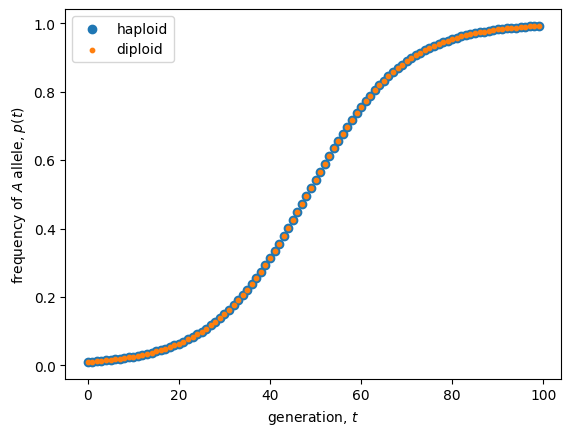

In [3]:
import matplotlib.pyplot as plt

# calculate allele frequency over time with recursion
w_A = 1.1 #relative fitness of allele A in the haploid model
w_AA = w_A*w_A #relative fitness of genotype AA in the diploid model
w_Aa = w_A #relative fitness of genotype Aa in the diploid model
p_now_hap = 0.01 #initial allele frequency, p_0
p_now_dip = p_now_hap
ps_hap, ps_dip = [], [] #lists to hold allele frequencies over time
ts = range(100) #list of time steps
for t in ts: #for each time
    ps_hap.append(p_now_hap) #add current allele frequency to list
    p_now_hap = w_A*p_now_hap/(w_A*p_now_hap+(1-p_now_hap)) #update allele frequency with haploid recursion equation
    ps_dip.append(p_now_dip) #add current allele frequency to list
    p_now_dip = (w_AA*p_now_dip**2 + w_Aa*p_now_dip*(1-p_now_dip))/(w_AA*p_now_dip**2 + 2*w_Aa*p_now_dip*(1-p_now_dip) + (1-p_now_dip)**2) #update allele frequency with diploid recursion equation
    
# plot
plt.scatter(ts, ps_hap, label='haploid')
plt.scatter(ts, ps_dip, s=10, label='diploid')
plt.xlabel("generation, $t$")
plt.ylabel("frequency of $A$ allele, $p(t)$")
plt.legend() #add legend to know which points belong to which model
plt.show()

<span id='section5'></span>
## 5. One-locus haploid selection in continuous time
<hr>

To model haploid selection in continuous-time we assume that during the selective phase each haploid individual has growth rate

- $r_A =$ growth rate of individuals with the $A$ allele
- $r_a =$ growth rate of individuals with the $a$ allele

and the relative numbers of each type don't change otherwise (ie, during union, diploidy, or meiosis).

We therefore have exponential growth of both genotypes, $\frac{\mathrm{d} n_i}{dt} = r_i n_i$.

At any particular point in time, $t$, the frequency of allele $A$ is, $p(t) = n_A(t)/(n_A(t) + n_a(t))$. 

We can therefore derive the rate of change in the frequency of allele $A$, $\mathrm{d}p/\mathrm{d}t$, using the qoutient rule (see Appendix 2 in the text for help with this and other math tricks)

$$
\begin{aligned}
\frac{\mathrm{d}p}{\mathrm{d}t}
&= \frac{\mathrm{d}\frac{n_A}{n_A + n_a}}{\mathrm{d}t} \\
&= \frac{\frac{\mathrm{d}n_A}{\mathrm{d}t} (n_A(t) + n_a(t)) - n_A(t) \frac{\mathrm{d}(n_A+n_a)}{\mathrm{d}t}}{(n_A(t) + n_a(t))^2}\\
&= \frac{r_A n_A(t) (n_A(t) + n_a(t)) - n_A(t) (r_A n_A(t) + r_a n_a(t))}{(n_A(t) + n_a(t))^2}\\
&= \frac{r_A n_A(t) n_a(t) - r_a n_A(t) n_a(t))}{(n_A(t) + n_a(t))^2}\\
&= \frac{(r_A -r_a)n_A(t) n_a(t)}{(n_A(t) + n_a(t))^2}\\
&= (r_A -r_a)p(t) q(t),
\end{aligned}
$$

where $s_c = r_A - r_a$ is the continuous-time **selection coefficient** of allele $A$.

A similar equation can be derived for the model of diploid-selection in continuous time, but we will not study it (see Problem 3.16 in the text if you are curious).

<span id='section6'></span>
## 6. Comparing haploid selection in discrete and continuous time
<hr>


Are the discrete- and continuous-time models of haploid selection as different as they look?

$$
p(t+1) = \frac{W_A p(t)}{W_A p(t) + W_a q(t)}
$$

$$
\frac{\mathrm{d}p}{\mathrm{d}t} = s_c p(t) q(t)
$$

Not really. Discrete and continuous time models generally behave in a similar fashion when changes occur slowly over time. For this model of haploid selection, this implies that the discrete and continuous models will be similar when the fitnesses of the two alleles are nearly equal, i.e., when $W_A - W_a$ is small. This is called "weak selection".

In the discrete model, the change in the allele frequency is

$$
\begin{aligned}
\Delta p &= p(t+1) - p(t) \\
&= \frac{W_A p(t)}{W_A p(t) + W_a q(t)} - p(t) \\
&= \frac{(W_A - W_a)p(t) q(t)}{W_A p(t) + W_a q(t)}.
\end{aligned}
$$

Now define $s_d = (W_A - W_a)/W_a$ as the discrete time selection coefficient. Subbing this in as $W_A = s_d W_a + W_a$ gives

$$
\begin{aligned}
\Delta p 
&= \frac{(W_A-W_a)p(t) q(t)}{W_A p(t) + W_a q(t)}\\
&= \frac{(s_d W_a + W_a - W_a) p(t) q(t)}{(s_d W_a + W_a) p(t) + W_a q(t)}\\
&= \frac{s_d W_a p(t) q(t)}{s_d W_a p(t) + W_a (p(t) + q(t))}\\
&= \frac{s_d W_a p(t) q(t)}{s_d W_a p(t) + W_a}\\
&= \frac{s_d p(t) q(t)}{s_d p(t) + 1}\\
\end{aligned}
$$

Now assume weak selection, i.e., that $s_d$ is small. This implies $s_d p(t) + 1 \approx 1$. Making this approximation we have

$$
\Delta p \approx s_d p(t) q(t)
$$

This is equivalent to the continuous-time model when the selection coefficients are equal, $s_c = s_d$.

<span id='section7'></span>
## 7. The models we've covered
<hr>

To summarize the last two lectures, we've derived four of the most classic models in ecology and evolution:

| Model | Discrete time | Continous time |
| ----- | ------------- | -------------- |
| Exponential growth | $n(t+1) = R n(t)$ | $\frac{\mathrm{d}n}{\mathrm{d}t} = r n(t)$ |
| Logistic growth | $n(t+1) = (1 + r(1 - \frac{n(t)}{K}))n(t)$ | $\frac{\mathrm{d}n}{\mathrm{d}t} = r(1 - \frac{n(t)}{K})n(t)$ |
| Haploid selection | $p(t+1) = \frac{W_A p(t)}{W_A p(t) + W_a q(t)}$ | $\frac{\mathrm{d}p}{\mathrm{d}t} = s p(t)(1-p(t))$ |
| Diploid selection | $p(t+1) = \frac{W_{AA}p(t)^2 + W_{Aa}p(t) q(t)}{W_{AA}p(t)^2 + 2 W_{Aa} p(t) q(t) + W_{aa} q(t)^2}$ | Not derived |

See textbook Sections 3.4 and 3.5 for models of interacting species and epidemiology, respectively, which we won't cover in class.